# Import dataset

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/shannentan22/Group-10-Ivermectin/main/Dataset.csv"
df = pd.read_csv(url)


# Data Preprocessing


## Handling missing values/ensuring no missing values
So to handle missing values, we use the drop method in the Pandas library. We then drop these specific columns from our dataset:  'Group', 'Collector', 'Category', 'Topic', 'Account bio', 'Location', 'Reasoning', 'Remarks', 'Reviewer', 'Review', 'Screenshot', 'Quote Tweets', 'Views', 'Rating'. This is because when our group did Data Collection, most of the columns mentioned above were only optional. The remaining columns were then dropped since we really can't connect it to our Research Proposal and what we were trying to find.

In [ ]:
df = df.drop(columns=['Group', 'Collector', 'Category', 'Topic', 'Account bio', 'Location', 'Reasoning', 'Remarks', 'Reviewer', 'Review', 'Screenshot', 'Quote Tweets', 'Views', 'Rating'])
df.head(5).style

## Handling outliers
So to handle outliers, our group used dropna method for the from the Pandas library. This is just to ensure that if some tweets under the "Theme" column were not "Anecdotal","Factual","None". They were dropped from the data

In [ ]:
# Test later
df.dropna(subset=['Theme'])
df.head(20)

## Ensuring formatting consistency

So to ensure formatting consistency, we used str.replace on the values under the Tweet Translated Column. We used regex expressions to replace parts of the tweet that start with "{Alt". This is because it can affect our data when we do NLP. It is important to note that we also removed symbols from the Translated Tweets such as question marks and exclamation signs since this might affect Tokenization when we do NLP.

In [ ]:
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r'\{Alt.*?\}', '', regex=True)
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r'\n', '', regex=True)
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r'.', '', regex=True)
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r',', '', regex=True)
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r'?', '', regex=True)
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r'!', '', regex=True)
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r'#', '', regex=True)
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r'@', '', regex=True)
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r'(', '', regex=True)
df['Tweet Translated'] = df['Tweet Translated'].str.replace(r')', '', regex=True)
pd.set_option('display.max_colwidth', None)
df.head(20)

## Normalization/standardization

For this part, we didn't do normalization or standardization. This is because our data is mainly nominal with only 3 categories, hence no need to do normalization or standardization to it.

In [ ]:
# No need to normalize/standardize because we're not dealing with numbers

## Categorical Data Encoding

For this part, since our data is also Categorical. We encoded "Anecdotal", "Factual", "None" as 0, 1, and 2 respectively. Note that since we dropped data that don't fit into those categories. The"Theme" column of the dataframe after Categorical Data Encoding will only have values from 0 - 2.

In [ ]:
# Convert Anecdotal to 1, Factual to 0, None to 2
cleanup_nums = {"Theme": {"Anecdotal": 0, "Factual": 1, "None": 2}}
df = df.replace(cleanup_nums)
df.head(5)

# Natural Language Processing

## Cleaning

To clean the dataset, we handled emojis and emoticons by replacing them with text using emoji and emote dictionaries.

In [ ]:
import re
import copy

# Handle Emojis [2]
url_emoji = "https://drive.google.com/uc?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v"
df_emoji = pd.read_pickle(url_emoji)
df_emoji = {v: k for k, v in df_emoji.items()}

def emoji_to_word(text):
  for emot in df_emoji:
    text = re.sub(r'('+emot+')', "_".join(df_emoji[emot].replace(",","").replace(":","").split()), text)
  return text

# Handle Emoticons [2]
url_emote = "https://drive.google.com/uc?id=1HDpafp97gCl9xZTQWMgP2kKK_NuhENlE"
df_emote = pd.read_pickle(url_emote)

def emote_to_word(text):
    for emot in df_emote:
        text = re.sub(u'('+emot+')', "_".join(df_emote[emot].replace(",","").split()), text)
        text = text.replace("<3", "heart" ) # not included in emoticons database
    return text

texts = copy.deepcopy(df['Tweet Translated'])

texts = [emoji_to_word(t) for t in texts]
texts = [emote_to_word(t) for t in texts]

df_emoji = pd.DataFrame({'Original': df['Tweet Translated'], 'Without Emotes': texts})
df_emoji.head(20)

## Tokenization, lower casing + Stop words removal

Then, we tokenized the Tweets and filtered them using English stopwords from nltk. We did not need to use Filipino stopwords anymore since we manually translated all of our Tweets to English.

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# fil_stopwords = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang"]

texts_tok = []
for text in texts:
    # tokenize the text into words
    words = word_tokenize(text)

    # remove stopwords
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    # filtered_words = [word for word in words if word.lower() not in fil_stopwords]

    # convert back into sentence
    filtered_sentence = ' '.join(filtered_words)
    texts_tok.append(filtered_sentence.lower()) # lower casing

df_filt = pd.DataFrame({'Original': texts, 'Tokenized': texts_tok})
df_filt.style.set_properties(**{'text-align': 'left'})
df_filt.head(20)

## Stemming and lemmatization

We then performed stemming and lemmatization on our data to reduce the words to a base root.

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

texts_stem, texts_lem = [], []

def stem_lem(text):
  words = text.split()

  # Stem each word
  stemmed_words = [stemmer.stem(word) for word in words]
  
  # Lemmatize each word
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  
  # Return the stemmed and lemmatized words as a tuple
  texts_stem.append(stemmed_words)
  texts_lem.append(lemmatized_words)

  return (stemmed_words, lemmatized_words)


# Process each text in the array
processed_texts = [stem_lem(t) for t in texts_tok]

df_sl = pd.DataFrame({'ID': df['ID'], 'Stemmed': texts_stem, 'Lemmatized': texts_lem})
df_sl.head(20)



## Merging the data frames

Then, we merged the data frame we obtained from performing NLP on to the original data frame.

In [ ]:
df = pd.merge(df, df_sl)
df.head(20)

# Data Exploration

## General Questions


### What is the size/shape of the dataset?

In [ ]:
df.shape

### What is the data type of each column?

In [ ]:
df.dtypes

### What is the range of values for each numeric column in the dataset?

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns
range_values = df[numeric_columns].describe().loc[['min', 'max']]
print(range_values)

## 1. Are there significantly more anecdotal than factual Tweets?

### Null Hypothesis: Only an insignificant number of tweets about the benefits of Ivermectin in curing COVID-19 are based on anecdotal evidence.       

### Alternative Hypothesis: A large percentage of tweets about the benefits of Ivermectin in curing COVID-19 were only based on anecdotal evidence.
---

To solve for this we had to use a Binomial Test to determine if the proportion of a binary variable is equal to a a previously claimed value which is that an insignificant number of anecdotal tweets make up the tweets collected. So we assume that the estimate chance of success is 50% which means that a tweet is either Anecdotal or Factual 


For this we will let the significance level of α = 0.05, while we use the formula for a binomial test

INSERT HERE

where k is the count of anecdotal tweets while n is the total amount of tweets.



In [ ]:
from scipy.stats import binom_test


anecdotal_number = df["Theme"].value_counts()[0]
not_anecdotal_number = df["Theme"].value_counts()[1] + df["Theme"].value_counts()[2]
totalnum = anecdotal_number + not_anecdotal_number

p_value = binom_test(anecdotal_number,totalnum, 0.5)

p_value



## 2. What words appear in the most viral Tweets?

### Data frame sorted by most viral Tweets

In [ ]:
likes_df = df.sort_values('Likes', ascending=False)
likes_df.head(20)

### Most common words in general

In [ ]:
common_words = pd.Series([item for sublist in df['Stemmed'] for item in sublist]).value_counts()
common_words.head(20)

### Most common words among the 20 most viral Tweets

In [ ]:
common_words = pd.Series([item for sublist in likes_df['Stemmed'].head(20) for item in sublist]).value_counts()
common_words.head(20)

## 3. When did the fake news Tweets occur more frequently?

In [ ]:
import calendar
df['Month Posted'] = df['Date posted'].str[3:5]
df['Year Posted'] = '20' + df['Date posted'].str[6:8]
df = df.astype({'Month Posted':'int'})
df = df.astype({'Year Posted':'int'})
df['Month Posted'] = df['Month Posted'].apply(lambda x: calendar.month_name[x])
df['Month-Year Posted'] = df['Month Posted'].astype(str) + ' ' + df['Year Posted'].astype(str)


In [ ]:
df_grouped = df.groupby('Month-Year Posted').size().reset_index(name='count')
idx = pd.date_range(min(pd.to_datetime(df['Month-Year Posted'], format='%B %Y')), max(pd.to_datetime(df['Month-Year Posted'], format='%B %Y')), freq='MS')
df_all = pd.DataFrame({'Month-Year Posted': idx.strftime('%B %Y'), 'count': 0})

df_merged = df_all.merge(df_grouped, on='Month-Year Posted', how='left')
df_merged['count'] = df_merged['count_y'].fillna(0)

# Create a bar graph
fx = df_merged.plot(kind='bar', x='Month-Year Posted', y='count', title='Number of Tweets Posted according to Month-Year')
fx.set_xlabel("Month-Year Posted")
fx.set_ylabel("Tweet Count")



In [ ]:
# Create a line graph
lx = df_merged.plot(kind='line', x='Month-Year Posted', y='count', title='Number of Tweets Posted according to Month-Year')
lx.set_xlabel("Month-Year Posted")
lx.set_ylabel("Tweet Count")

## 4. From whom did most of the anecdotal or factual Tweets come from?



### Among all Tweets

In [ ]:
ax = df['Account type'].value_counts().plot(kind='bar', rot=0, title='Account type distribution among all Tweets')
ax.set_xlabel("Account Type")
ax.set_ylabel("Tweet Count")

### Among anecdotal Tweets

In [ ]:
ax = df.loc[df['Theme'] == 0, 'Account type'].value_counts().plot(kind='bar', rot=0, title='Account type distribution among anecdotal Tweets')
ax.set_xlabel("Account Type")
ax.set_ylabel("Tweet Count")

### Among factual Tweets

In [ ]:
ax = df.loc[df['Theme'] == 1, 'Account type'].value_counts().plot(kind='bar', rot=0, title='Account type distribution among factual Tweets')
ax.set_xlabel("Account Type")
ax.set_ylabel("Tweet Count")

## 5. How does engagement differ between different themes and account types?



In [ ]:
# heat map
import pandas as pd
import seaborn as sns

theme_map = {0: "Anecdotal", 1: "Factual", 2: "None"}
# group the data by 'Account Type' and 'Theme' and get the size of each group
grouped = df.groupby(['Account type', 'Theme']).size().reset_index(name='count')

# map the numeric values in the 'Theme' column to words using the theme_map dictionary
grouped['Theme'] = grouped['Theme'].map(theme_map)

# grouped.head(5)

# create a pivot table with the count of data for each combination of 'Account Type' and 'Theme'
pivot_table = pd.pivot_table(grouped, values='count', index='Account type', columns='Theme')

# plot the pivot table as a heatmap
hx = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
hx.set_title('Heatmap')

<a href="https://colab.research.google.com/github/shannentan22/Group-10-Ivermectin/blob/main/cs_132_data_exploration_group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/shannentan22/Group-10-Ivermectin/main/Dataset.csv"
df = pd.read_csv(url)


## Handling missing values/ensuring no missing values
So to handle missing values, we use the drop method in the Pandas library. We then drop these specific columns from our dataset:  'Group', 'Collector', 'Category', 'Topic', 'Account bio', 'Location', 'Reasoning', 'Remarks', 'Reviewer', 'Review', 'Screenshot', 'Quote Tweets', 'Views', 'Rating'. This is because when our group did Data Collection, most of the columns mentioned above were only optional. The remaining columns were then dropped since we really can't connect it to our Research Proposal and what we were trying to find.

##Handling outliers

##Ensuring formatting consistency






##Normalization/standardization

##Categorical Data Encoding

#Natural Language Processing

In [ ]:
import re
import copy

# Handle Emojis [2]
url_emoji = "https://drive.google.com/uc?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v"
df_emoji = pd.read_pickle(url_emoji)
df_emoji = {v: k for k, v in df_emoji.items()}

def emoji_to_word(text):
  for emot in df_emoji:
    text = re.sub(r'('+emot+')', "_".join(df_emoji[emot].replace(",","").replace(":","").split()), text)
  return text

# Handle Emoticons [2]
url_emote = "https://drive.google.com/uc?id=1HDpafp97gCl9xZTQWMgP2kKK_NuhENlE"
df_emote = pd.read_pickle(url_emote)

def emote_to_word(text):
    for emot in df_emote:
        text = re.sub(u'('+emot+')', "_".join(df_emote[emot].replace(",","").split()), text)
        text = text.replace("<3", "heart" ) # not included in emoticons database
    return text

texts = copy.deepcopy(df['Tweet Translated'])

texts = [emoji_to_word(t) for t in texts]
texts = [emote_to_word(t) for t in texts]

df_emoji = pd.DataFrame({'Original': df['Tweet Translated'], 'Without Emotes': texts})
df_emoji.head(20)

,Original,Without Emotes
0,GMA lied four days ago in their clip about Ivermectin Dr Jen is stupid and has definitely never tried to use Ivermectin against Covid-19 How do I know this I have 7 seven family members back in Romania who were saved by Ivermectin and courageous doctors in Jan-May 2021,GMA lied four days ago in their clip about Ivermectin Dr Jen is stupid and has definitely never tried to use Ivermectin against Covid-19 How do I know this I have 7 seven family members back in Romania who were saved by Ivermectin and courageous doctors in Jan-May 2021
1,It's true Ivermectin works been a covid survivor drank Ivermectin and all symptoms went away after 3 days,It's true Ivermectin works been a covid survivor drank Ivermectin and all symptoms went away after 3 days
2,This is the true cure to covid 19 Clearances in the Philippines Ivermectin clinical trial expected this month —DOST exec https://remateph/clearances-sa-ph-ivermectin-clinical-trial-asahan-ngayong-buwan-dost-exec/ via RematePh,This is the true cure to covid 19 Clearances in the Philippines Ivermectin clinical trial expected this month —DOST exec httpsSkeptical_annoyed_undecided_uneasy_or_hesitant/remateph/clearances-sa-ph-ivermectin-clinical-trial-asahan-ngayong-buwan-dost-exec/ via RematePh
3,I don’t understand why some staff and friends both vaccinated and unvaccinated who took Ivermectin never got serious coughs and long Covid while some who were double vaccinated with boosters even got it worse What kind of science do we have now Ivermectin won a Nobel prize,I don’t understand why some staff and friends both vaccinated and unvaccinated who took Ivermectin never got serious coughs and long Covid while some who were double vaccinated with boosters even got it worse What kind of science do we have now Ivermectin won a Nobel prize
4,i sent the link I'm unfortunate their sister got better from ivermectin,i sent the link I'm unfortunate their sister got better from ivermectin
5,I have given many people Ivermectin that have gotten better from Covid19 and they say that in 24 hours there is an improvement immediately fever and cough gone Luckily I was able to find Dr Allan Landrito and bought several bottles at P35/capsule last February & my family and children are safe,I have given many people Ivermectin that have gotten better from Covid19 and they say that in 24 hours there is an improvement immediately fever and cough gone Luckily I was able to find Dr Allan Landrito and bought several bottles at P35/capsule last February & my family and children are safe
6,From 1 tablet of Ivermectin the coughs of my older sister got better and she was able to sleep soundly If only Ivermectin was allowed in here in Canada maybe I would have gotten better immediately from my covid where it was 10 days that I was coughing,From 1 tablet of Ivermectin the coughs of my older sister got better and she was able to sleep soundly If only Ivermectin was allowed in here in Canada maybe I would have gotten better immediately from my covid where it was 10 days that I was coughing
7,take care it is super effective to boil ginger that is your drinking water then steam it personally I took ivermectin it was effective for us we got negative after taking ivermectin stay safe everyone❤️,take care it is super effective to boil ginger that is your drinking water then steam it personally I took ivermectin it was effective for us we got negative after taking ivermectin stay safe everyonered_heart️
8,TANGINA I DRANK IVERMECTIN SO THAT THERE WILL BE NO MORE TROUBLE CAN YOU FUCKING LET IT GO AND LET ME GET VACCINATED IN 8-ISH MONTHS,TANGINA I DRANK IVERMECTIN SO THAT THERE WILL BE NO MORE TROUBLE CAN YOU FUCKING LET IT GO AND LET ME GET VACCINATED IN 8-ISH MONTHS
9,I live in the Philippinesmost people here are very skeptical about vaccines Ivermectin is available and being used very successfully Also in Mexico India and other 3rd world countries It works on all Corona viruses and variants at all stages

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# fil_stopwords = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang"]

texts_tok = []
for text in texts:
    # tokenize the text into words
    words = word_tokenize(text)

    # remove stopwords
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    # filtered_words = [word for word in words if word.lower() not in fil_stopwords]

    # convert back into sentence
    filtered_sentence = ' '.join(filtered_words)
    texts_tok.append(filtered_sentence.lower()) # lower casing

df_filt = pd.DataFrame({'Original': texts, 'Tokenized': texts_tok})
df_filt.style.set_properties(**{'text-align': 'left'})
df_filt.head(20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Original,Tokenized
0,GMA lied four days ago in their clip about Ivermectin Dr Jen is stupid and has definitely never tried to use Ivermectin against Covid-19 How do I know this I have 7 seven family members back in Romania who were saved by Ivermectin and courageous doctors in Jan-May 2021,gma lied four days ago clip ivermectin dr jen stupid definitely never tried use ivermectin covid-19 how i know i 7 seven family members back romania saved ivermectin courageous doctors jan-may 2021
1,It's true Ivermectin works been a covid survivor drank Ivermectin and all symptoms went away after 3 days,it 's true ivermectin works covid survivor drank ivermectin symptoms went away 3 days
2,This is the true cure to covid 19 Clearances in the Philippines Ivermectin clinical trial expected this month —DOST exec httpsSkeptical_annoyed_undecided_uneasy_or_hesitant/remateph/clearances-sa-ph-ivermectin-clinical-trial-asahan-ngayong-buwan-dost-exec/ via RematePh,this true cure covid 19 clearances philippines ivermectin clinical trial expected month —dost exec httpsskeptical_annoyed_undecided_uneasy_or_hesitant/remateph/clearances-sa-ph-ivermectin-clinical-trial-asahan-ngayong-buwan-dost-exec/ via remateph
3,I don’t understand why some staff and friends both vaccinated and unvaccinated who took Ivermectin never got serious coughs and long Covid while some who were double vaccinated with boosters even got it worse What kind of science do we have now Ivermectin won a Nobel prize,i ’ understand staff friends vaccinated unvaccinated took ivermectin never got serious coughs long covid double vaccinated boosters even got worse what kind science ivermectin nobel prize
4,i sent the link I'm unfortunate their sister got better from ivermectin,sent link i 'm unfortunate sister got better ivermectin
5,I have given many people Ivermectin that have gotten better from Covid19 and they say that in 24 hours there is an improvement immediately fever and cough gone Luckily I was able to find Dr Allan Landrito and bought several bottles at P35/capsule last February & my family and children are safe,i given many people ivermectin gotten better covid19 say 24 hours improvement immediately fever cough gone luckily i able find dr allan landrito bought several bottles p35/capsule last february & family children safe
6,From 1 tablet of Ivermectin the coughs of my older sister got better and she was able to sleep soundly If only Ivermectin was allowed in here in Canada maybe I would have gotten better immediately from my covid where it was 10 days that I was coughing,from 1 tablet ivermectin coughs older sister got better able sleep soundly if ivermectin allowed canada maybe i would gotten better immediately covid 10 days i coughing
7,take care it is super effective to boil ginger that is your drinking water then steam it personally I took ivermectin it was effective for us we got negative after taking ivermectin stay safe everyonered_heart️,take care super effective boil ginger drinking water steam personally i took ivermectin effective us got negative taking ivermectin stay safe everyonered_heart️
8,TANGINA I DRANK IVERMECTIN SO THAT THERE WILL BE NO MORE TROUBLE CAN YOU FUCKING LET IT GO AND LET ME GET VACCINATED IN 8-ISH MONTHS,tangina i drank ivermectin so that there will be no more trouble can you fucking let it go and let me get vaccinated in 8-ish months
9,I live in the Philippinesmost people here are very skeptical about vaccines Ivermectin is available and being used very successfully Also in Mexico India and other 3rd world countries It works on all Corona viruses and variants at all stages The government liesmoney,i live philippinesmost people skeptical vaccines ivermectin available used successfully also mexico india 3rd world countries it works corona viruses variants stages the government liesmoney


In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

texts_stem, texts_lem = [], []

def stem_lem(text):
  words = text.split()

  # Stem each word
  stemmed_words = [stemmer.stem(word) for word in words]
  
  # Lemmatize each word
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  
  # Return the stemmed and lemmatized words as a tuple
  texts_stem.append(stemmed_words)
  texts_lem.append(lemmatized_words)

  return (stemmed_words, lemmatized_words)


# Process each text in the array
processed_texts = [stem_lem(t) for t in texts_tok]

df_sl = pd.DataFrame({'ID': df['ID'], 'Stemmed': texts_stem, 'Lemmatized': texts_lem})
df_sl.head(20)



,ID,Stemmed,Lemmatized
0,10-1,"[gma, lie, four, day, ago, clip, ivermectin, dr, jen, stupid, definit, never, tri, use, ivermectin, covid-19, how, i, know, i, 7, seven, famili, member, back, romania, save, ivermectin, courag, doctor, jan-may, 2021]","[gma, lied, four, day, ago, clip, ivermectin, dr, jen, stupid, definitely, never, tried, use, ivermectin, covid-19, how, i, know, i, 7, seven, family, member, back, romania, saved, ivermectin, courageous, doctor, jan-may, 2021]"
1,10-2,"[it, 's, true, ivermectin, work, covid, survivor, drank, ivermectin, symptom, went, away, 3, day]","[it, 's, true, ivermectin, work, covid, survivor, drank, ivermectin, symptom, went, away, 3, day]"
2,10-3,"[thi, true, cure, covid, 19, clearanc, philippin, ivermectin, clinic, trial, expect, month, —dost, exec, httpsskeptical_annoyed_undecided_uneasy_or_hesitant/remateph/clearances-sa-ph-ivermectin-clinical-trial-asahan-ngayong-buwan-dost-exec/, via, remateph]","[this, true, cure, covid, 19, clearance, philippine, ivermectin, clinical, trial, expected, month, —dost, exec, httpsskeptical_annoyed_undecided_uneasy_or_hesitant/remateph/clearances-sa-ph-ivermectin-clinical-trial-asahan-ngayong-buwan-dost-exec/, via, remateph]"
3,10-4,"[i, ’, understand, staff, friend, vaccin, unvaccin, took, ivermectin, never, got, seriou, cough, long, covid, doubl, vaccin, booster, even, got, wors, what, kind, scienc, ivermectin, nobel, prize]","[i, ’, understand, staff, friend, vaccinated, unvaccinated, took, ivermectin, never, got, serious, cough, long, covid, double, vaccinated, booster, even, got, worse, what, kind, science, ivermectin, nobel, prize]"
4,10-5,"[sent, link, i, 'm, unfortun, sister, got, better, ivermectin]","[sent, link, i, 'm, unfortunate, sister, got, better, ivermectin]"
5,10-6,"[i, given, mani, peopl, ivermectin, gotten, better, covid19, say, 24, hour, improv, immedi, fever, cough, gone, luckili, i, abl, find, dr, allan, landrito, bought, sever, bottl, p35/capsul, last, februari, &, famili, children, safe]","[i, given, many, people, ivermectin, gotten, better, covid19, say, 24, hour, improvement, immediately, fever, cough, gone, luckily, i, able, find, dr, allan, landrito, bought, several, bottle, p35/capsule, last, february, &, family, child, safe]"
6,10-7,"[from, 1, tablet, ivermectin, cough, older, sister, got, better, abl, sleep, soundli, if, ivermectin, allow, canada, mayb, i, would, gotten, better, immedi, covid, 10, day, i, cough]","[from, 1, tablet, ivermectin, cough, older, sister, got, better, able, sleep, soundly, if, ivermectin, allowed, canada, maybe, i, would, gotten, better, immediately, covid, 10, day, i, coughing]"
7,10-8,"[take, care, super, effect, boil, ginger, drink, water, steam, person, i, took, ivermectin, effect, us, got, neg, take, ivermectin, stay, safe, everyonered_heart️]","[take, care, super, effective, boil, ginger, drinking, water, steam, personally, i, took, ivermectin, effective, u, got, negative, taking, ivermectin, stay, safe, everyonered_heart️]"
8,10-9,"[tangina, i, drank, ivermectin, so, that, there, will, be, no, more, troubl, can, you, fuck, let, it, go, and, let, me, get, vaccin, in, 8-ish, month]","[tangina, i, drank, ivermectin, so, that, there, will, be, no, more, trouble, can, you, fucking, let, it, go, and, let, me, get, vaccinated, in, 8-ish, month]"
9,10-10,"[i, live, philippinesmost, peopl, skeptic, vaccin, ivermectin, avail, use, success, also, mexico, india, 3rd, world, countri, it, work, corona, virus, variant, stage, the, govern, liesmoney]","[i, live, philippinesmost, people, skeptical, vaccine, ivermectin, available, used, successfully, also, mexico, india, 3rd, world, country, it, work, corona, virus, variant, stage, the, government, liesmoney]"


In [ ]:
df = pd.merge(df, df_sl)
df.head(20)

,ID,Timestamp,Tweet URL,Keywords,Account handle,Account name,Account type,Joined,Following,Followers,...,Tweet Length,Tweet Type,Date posted,Content type,Likes,Replies,Retweets,Theme,Stemmed,Lemmatized
0,10-1,29/03/23 21:26:35,https://twitter.com/Marius_Hancu/status/1404795276368416773?s=20,Ivermectin COVID-19 GMA,@Marius_Hancu,Marius Hancu,Identified,05/12,0,353,...,281,"Text, URL",15/06/21 21:37,Emotional,3,3,0,0,"[gma, lie, four, day, ago, clip, ivermectin, dr, jen, stupid, definit, never, tri, use, ivermectin, covid-19, how, i, know, i, 7, seven, famili, member, back, romania, save, ivermectin, courag, doctor, jan-may, 2021]","[gma, lied, four, day, ago, clip, ivermectin, dr, jen, stupid, definitely, never, tried, use, ivermectin, covid-19, how, i, know, i, 7, seven, family, member, back, romania, saved, ivermectin, courageous, doctor, jan-may, 2021]"
1,10-2,29/03/23 22:05:34,https://twitter.com/Migoytoot/status/1378152893124014081?s=20,Ivermectin COVID gumana,@Migoytoot,Migs Bert,Anonymous,11/17,543,16,...,114,Text,03/04/21 09:10,Rational,0,0,0,0,"[it, 's, true, ivermectin, work, covid, survivor, drank, ivermectin, symptom, went, away, 3, day]","[it, 's, true, ivermectin, work, covid, survivor, drank, ivermectin, symptom, went, away, 3, day]"
2,10-3,29/03/23 22:20:58,https://twitter.com/lucky166345582/status/1479500994308636675,Ivermectin COVID 19 gamot,@lucky166345582,lucky1,Anonymous,05/23,120,3,...,221,"Text, URL",18/01/22 01:11,Rational,0,0,0,1,"[thi, true, cure, covid, 19, clearanc, philippin, ivermectin, clinic, trial, expect, month, —dost, exec, httpsskeptical_annoyed_undecided_uneasy_or_hesitant/remateph/clearances-sa-ph-ivermectin-clinical-trial-asahan-ngayong-buwan-dost-exec/, via, remateph]","[this, true, cure, covid, 19, clearance, philippine, ivermectin, clinical, trial, expected, month, —dost, exec, httpsskeptical_annoyed_undecided_uneasy_or_hesitant/remateph/clearances-sa-ph-ivermectin-clinical-trial-asahan-ngayong-buwan-dost-exec/, via, remateph]"
3,10-4,29/03/23 22:28:35,https://twitter.com/AngeliPV/status/1551761834134233088?s=20,Ivermectin vaccinated,@AngeliPV,Angeli Pangilinan Valenciano,Identified,07/10,4239,300223,...,278,Text,26/07/22 10:50,Emotional,126,71,147,0,"[i, ’, understand, staff, friend, vaccin, unvaccin, took, ivermectin, never, got, seriou, cough, long, covid, doubl, vaccin, booster, even, got, wors, what, kind, scienc, ivermectin, nobel, prize]","[i, ’, understand, staff, friend, vaccinated, unvaccinated, took, ivermectin, never, got, serious, cough, long, covid, double, vaccinated, booster, even, got, worse, what, kind, science, ivermectin, nobel, prize]"
4,10-5,29/03/23 23:04:50,https://twitter.com/anabashode/status/1379457442296127490?s=20,Ivermectin gumaling,@anabashode,ana⁷ 💜🙏🍍🍇✨🍀,Anonymous,06/10,3369,1029,...,63,"Text, Reply",04/06/21 23:34,Emotional,0,1,0,0,"[sent, link, i, 'm, unfortun, sister, got, better, ivermectin]","[sent, link, i, 'm, unfortunate, sister, got, better, ivermectin]"
5,10-6,29/03/23 23:08:54,https://twitter.com/jojo_castaneda/status/1378087953705000962?s=20,Ivermectin gumaling,@jojo_castaneda,Jojo Castaneda,Identified,05/17,1153,422,...,274,"Text, Reply",03/04/21 04:52,Rational,3,1,0,0,"[i, given, mani, peopl, ivermectin, gotten, better, covid19, say, 24, hour, improv, immedi, fever, cough, gone, luckili, i, abl, find, dr, allan, landrito, bought, sever, bottl, p35/capsul, last, februari, &, famili, children, safe]","[i, given, many, people, ivermectin, gotten, better, covid19, say, 24, hour, improvement, immediately, fever, cough, gone, luckily, i, able, find, dr, allan, landrito, bought, several, bottle, p35/capsule, last, february, &, family, child, safe]"
6,10-7,29/03/23 23:16:18,https://twitter.com/seddasa/status/1479952771994599433?s=20,Ivermectin gumaling COVID,@seddasa,sed dasa,Identified,04/09,980,123,...,200,"Text, Reply",09/01/22 07:06,Rational,1,0,0,0,"[from, 1, tablet, ivermectin, cough, older, sister, got, better, abl, sleep, soundli, if, iverme

## General Questions


In [ ]:
df.shape

(101, 22)

In [ ]:
df.dtypes

ID                  object
Timestamp           object
Tweet URL           object
Keywords            object
Account handle      object
Account name        object
Account type        object
Joined              object
Following            int64
Followers           object
Tweet               object
Tweet Translated    object
Tweet Length         int64
Tweet Type          object
Date posted         object
Content type        object
Likes                int64
Replies              int64
Retweets             int64
Theme                int64
Stemmed             object
Lemmatized          object
dtype: object

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns
range_values = df[numeric_columns].describe().loc[['min', 'max']]
print(range_values)

     Following  Tweet Length  Likes  Replies  Retweets  Theme
min        0.0          38.0    0.0      0.0       0.0    0.0
max     4968.0        2190.0  482.0     71.0     194.0    2.0


### Null Hypothesis: Only an insignificant number of tweets about the benefits of Ivermectin in curing COVID-19 are based on anecdotal evidence.       

### Alternative Hypothesis: A large percentage of tweets about the benefits of Ivermectin in curing COVID-19 were only based on anecdotal evidence.
---

To solve for this we had to use a Binomial Test to determine if the proportion of a binary variable is equal to a a previously claimed value which is that an insignificant number of anecdotal tweets make up the tweets collected. So we assume that the estimate chance of success is 50% which means that a tweet is either Anecdotal or Factual 


For this we will let the significance level of α = 0.05, while we use the formula for a binomial test

INSERT HERE

where k is the count of anecdotal tweets while n is the total amount of tweets.



## 2. What words appear in the most viral Tweets?

In [ ]:
likes_df = df.sort_values('Likes', ascending=False)
likes_df.head(20)

,ID,Timestamp,Tweet URL,Keywords,Account handle,Account name,Account type,Joined,Following,Followers,...,Tweet Length,Tweet Type,Date posted,Content type,Likes,Replies,Retweets,Theme,Stemmed,Lemmatized
95,10-96,31/03/23 13:45:33,https://twitter.com/OMGTheMess/status/1421991059467370498,Ivermectin end covid 19,@OMGTheMess,Old Soldier,Anonymous,04/13,4831,25167,...,219,Text,02/08/21 08:27,Rational,482,69,194,1,"[one, effect, treatment, covid, identifi, monash, univers, along, doherti, institut, show, ivermectin, kill, sars-cov-2, viru, within, 48, hour, thi, cours, silenc]","[one, effective, treatment, covid, identified, monash, university, along, doherty, institute, showed, ivermectin, kill, sars-cov-2, virus, within, 48, hour, this, course, silenced]"
57,10-58,31/03/23 22:19:40,https://mobile.twitter.com/CKellyUAP/status/1374125291631611906,Ivermectin effective Philippines,@CKellyUAP,Craig Kelly,Identified,11/20,4445,87.3K,...,356,"Text, URL",23/03/21 06:26,Rational,212,14,86,1,"[ivermectin, view, game, changer, philippin, 's, increasingli, seen, low, cost, &, effect, way, deal, covid, countri, face, mani, logist, challeng, they, 're, best, save, live, {, httpsskeptical_annoyed_undecided_uneasy_or_hesitant/wwwmanilatimesnet/2021/03/21/opinion/columnists/ivermectin-game-changer-vs-covid-19-whats-the-controversy/853847/, }]","[ivermectin, viewed, game, changer, philippine, 's, increasingly, seen, low, cost, &, effective, way, dealing, covid, country, facing, many, logistical, challenge, they, 're, best, save, life, {, httpsskeptical_annoyed_undecided_uneasy_or_hesitant/wwwmanilatimesnet/2021/03/21/opinion/columnists/ivermectin-game-changer-vs-covid-19-whats-the-controversy/853847/, }]"
3,10-4,29/03/23 22:28:35,https://twitter.com/AngeliPV/status/1551761834134233088?s=20,Ivermectin vaccinated,@AngeliPV,Angeli Pangilinan Valenciano,Identified,07/10,4239,300223,...,278,Text,26/07/22 10:50,Emotional,126,71,147,0,"[i, ’, understand, staff, friend, vaccin, unvaccin, took, ivermectin, never, got, seriou, cough, long, covid, doubl, vaccin, booster, even, got, wors, what, kind, scienc, ivermectin, nobel, prize]","[i, ’, understand, staff, friend, vaccinated, unvaccinated, took, ivermectin, never, got, serious, cough, long, covid, double, vaccinated, booster, even, got, worse, what, kind, science, ivermectin, nobel, prize]"
72,10-73,3/30/2023 20:44:35,https://twitter.com/zelformilles/status/1429821081192333313,Ivermectin effective,@zelformilles,Eliezl Custodio,Identified,07/17,84,176,...,344,"Text, Image",23/07/22 23:01,Emotional,126,1,12,0,"[thi, fake, news, they, got, covid, drank, ivermectin, got, cure, a, lot, peol, cure, what, evid, quack, quack, doctor, need, they, n't, like, cheap, safe, effect, medicin, sinc, ca, n't, profit, profit, vaccin]","[this, fake, news, they, got, covid, drank, ivermectin, got, cured, a, lot, peole, cured, what, evidence, quack, quack, doctor, need, they, n't, like, cheap, safe, effective, medicine, since, ca, n't, profit, profit, vaccine]"
86,10-87,31/03/23 08:51:23,https://mobile.twitter.com/RTWFoundation/status/1435114915472175108,ivermectin pharma philipplines,@RTWFoundation,RTWFoundation,Media,02/12,21,12,...,244,"Text, Reply",07/09/21 13:37,Emotional,111,7,10,0,"[lot, live, save, philippin, ivermectin, same, africa, my, foundat, gave, away, thousand, dose, big, pharma, politician, investor, anyth, suppress, treatment, remedi, shame]","[lot, life, saved, philippine, ivermectin, same, africa, my, foundation, gave, away, thousand, dos, big, pharma, politician, investor, anything, suppress, treatment, remedy, shame]"
62,10-63,01/04/23 00:01:38,https://mobile.twitter.com/vikingwombat/status/1439713632594501633,Ivermectin covid Philippines,@vikingwombat,Wanda,Anonymous,11/10,410,235,...,194,"Text, Reply",20/09/21 06:10,Rational,54,2,20,0,"[my, american, friend, philippin, take, ivermectin15mg, everi, 10, daysand, one, contract, covid, control, they, also, 70, year, age, unvaccin]","[my, american, friend, 

In [ ]:
common_words = pd.Series([item for sublist in df['Stemmed'] for item in sublist]).value_counts()
common_words.head(20)

ivermectin    129
covid          46
effect         39
got            31
i              30
philippin      29
doctor         29
use            27
better         26
's             25
vaccin         24
n't            21
one            20
mani           19
the            19
peopl          18
they           17
it             17
sinc           17
solut          17
dtype: int64

In [ ]:
common_words = pd.Series([item for sublist in likes_df['Stemmed'].head(20) for item in sublist]).value_counts()
common_words.head(20)

ivermectin    23
covid         10
philippin      8
effect         8
i              8
one            5
they           5
got            5
vaccin         5
work           4
medicin        4
’              4
doctor         4
&              4
know           4
sinc           3
year           3
countri        3
's             3
everi          3
dtype: int64

In [ ]:
import calendar
df['Month Posted'] = df['Date posted'].str[3:5]
df['Year Posted'] = '20' + df['Date posted'].str[6:8]
df = df.astype({'Month Posted':'int'})
df = df.astype({'Year Posted':'int'})
df['Month Posted'] = df['Month Posted'].apply(lambda x: calendar.month_name[x])
df['Month-Year Posted'] = df['Month Posted'].astype(str) + ' ' + df['Year Posted'].astype(str)


Text(0, 0.5, 'Tweet Count')

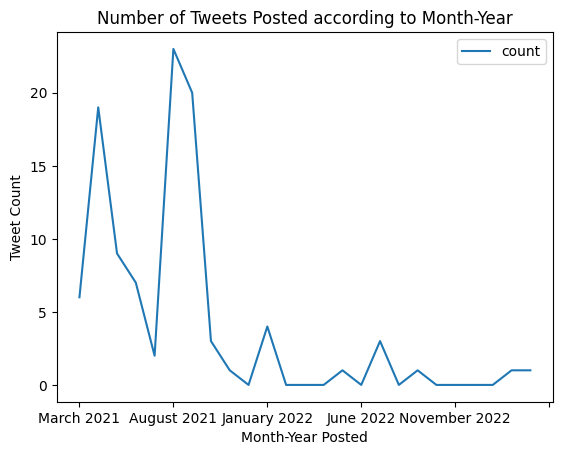

In [ ]:
# Create a line graph
lx = df_merged.plot(kind='line', x='Month-Year Posted', y='count', title='Number of Tweets Posted according to Month-Year')
lx.set_xlabel("Month-Year Posted")
lx.set_ylabel("Tweet Count")

### Among all Tweets

### Among anecdotal Tweets

### Among factual Tweets

## 5. How does engagement differ between different themes and account types?



## 6. Is there a correlation between the length of the Tweet and the number of likes?

#Areas of Interests:


1.   Are there significantly more anecdotal than factual Tweets? - A4th
2.   What words appear in the most viral Tweets (for overall, factual, and anecdotal)? - Shared
3.   When did the fake news Tweets occur more frequently? - Paul
4.   From whom did most of the anecdotal or factual Tweets come from (location, verified)? - Shannen
5.   How does engagement differ between different themes?

